<div style="font-family: 'Times New Roman';">

<h1 style="font-size:28px; font-weight:bold;">
Machine Learning Phase – Demand Prediction Model
</h1>

<h2 style="font-size:24px; font-style:italic;">
Project Objective
</h2>

<p style="font-size:20px; line-height:1.6;">
The objective of this phase is to build a supervised machine learning model to predict product demand 
(Number of products sold) using supply chain operational, financial, and logistical variables.
</p>

<p style="font-size:20px; line-height:1.6;">
The predictive model will support inventory optimization, supplier planning, cost efficiency analysis,
and improved demand forecasting within the supply chain network.
</p>

<h2 style="font-size:24px; font-style:italic;">
Target Variable
</h2>

<p style="font-size:20px; line-height:1.6;">
Target Variable: <b>Number of products sold</b>
</p>

<p style="font-size:20px; line-height:1.6;">
This is a continuous numerical variable. Therefore, the problem is formulated as a
<b>Supervised Regression Task</b>.
</p>

</div>


In [21]:
# ==============================================================
# Machine Learning Phase - Supply Chain Demand Prediction
# ==============================================================

# Core Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ignore warnings for clean output
import warnings
warnings.filterwarnings('ignore')

# Set professional plotting style
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'Times New Roman'

print("Libraries imported successfully.")


Libraries imported successfully.


In [22]:
# Load the dataset
df = pd.read_csv("D:\DATA PROJETS\Supply Chain Management Dashboard\DATASET/supply_chain_data.csv")

# Display first 5 rows
df.head()


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [23]:
# Display shape of dataset
print("Dataset Shape:", df.shape)

# Display column names
print("\nColumns in Dataset:")
print(df.columns)

# Check data types
print("\nDataset Information:")
df.info()


Dataset Shape: (100, 24)

Columns in Dataset:
Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Numb

<div style="font-family: 'Times New Roman';">

<h2 style="font-size:24px; font-style:italic;">
Feature Selection and Leakage Control
</h2>

<p style="font-size:20px; line-height:1.6;">
Before building the predictive model, it is critical to remove variables that may introduce 
data leakage. Data leakage occurs when information that would not be available at prediction 
time is used to train the model, resulting in artificially high performance.
</p>

<p style="font-size:20px; line-height:1.6;">
The following columns are removed:
</p>

<p style="font-size:20px; line-height:1.6;">
• SKU – Identifier only, no predictive meaning<br>
• Revenue generated – Directly dependent on sales<br>
• Costs – Aggregated financial outcome variable
</p>

<p style="font-size:20px; line-height:1.6;">
The target variable selected for this regression task is:
<b>Number of products sold</b>
</p>

</div>


In [24]:
# Define target variable
target_column = "Number of products sold"

# Columns to remove (leakage + identifiers)
columns_to_drop = [
    "SKU",
    "Revenue generated",
    "Costs"
]

# Drop leakage columns
df_model = df.drop(columns=columns_to_drop)

# Separate features and target
X = df_model.drop(columns=[target_column])
y = df_model[target_column]

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Feature matrix shape: (100, 20)
Target vector shape: (100,)


<div style="font-family: 'Times New Roman';">

<h2 style="font-size:24px; font-style:italic;">
Categorical Variable Encoding
</h2>

<p style="font-size:20px; line-height:1.6;">
The dataset contains several categorical variables such as product type,
supplier name, shipping carriers, location, inspection results, transportation modes,
and routes.
</p>

<p style="font-size:20px; line-height:1.6;">
Since these variables are nominal in nature and do not contain ordinal relationships,
One-Hot Encoding is applied to convert them into numerical format.
</p>

<p style="font-size:20px; line-height:1.6;">
To avoid multicollinearity and the dummy variable trap, one category from each feature
is dropped using the parameter <b>drop_first=True</b>.
</p>

<p style="font-size:20px; line-height:1.6;">
This ensures stable regression coefficients and improves model interpretability.
</p>

</div>


<div style="font-family: 'Times New Roman';">

<h2 style="font-size:24px; font-style:italic;">
Train-Test Split and Feature Scaling
</h2>

<p style="font-size:20px; line-height:1.6;">
The dataset is divided into training and testing subsets using an 80–20 split.
This ensures that model performance is evaluated on unseen data.
</p>

<p style="font-size:20px; line-height:1.6;">
A fixed random_state of 42 is used to ensure reproducibility.
</p>

<p style="font-size:20px; line-height:1.6;">
Feature scaling is applied using StandardScaler. This transformation standardizes 
features by removing the mean and scaling to unit variance.
</p>

<p style="font-size:20px; line-height:1.6;">
Scaling is particularly important for linear regression and gradient-based models 
to ensure balanced feature contribution.
</p>

</div>


In [25]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (80, 34)
Testing set shape: (20, 34)


In [26]:
# Initialize scaler
scaler = StandardScaler()

# Fit scaler on training data only
X_train_scaled = scaler.fit_transform(X_train)

# Transform testing data
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed.")


Feature scaling completed.


<div style="font-family: 'Times New Roman';">

<h2 style="font-size:24px; font-style:italic;">
Baseline Model – Linear Regression
</h2>

<p style="font-size:20px; line-height:1.6;">
Linear Regression is implemented as the baseline model for this regression task.
It assumes a linear relationship between the independent variables and the target variable.
</p>

<p style="font-size:20px; line-height:1.6;">
This model provides a benchmark performance metric against which more advanced 
models such as Random Forest and Gradient Boosting will be compared.
</p>

<p style="font-size:20px; line-height:1.6;">
Model evaluation metrics used:
</p>

<p style="font-size:20px; line-height:1.6;">
• Mean Absolute Error (MAE)<br>
• Root Mean Squared Error (RMSE)<br>
• R² Score
</p>

</div>


In [27]:
# Initialize Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train_scaled, y_train)

print("Linear Regression model trained successfully.")


Linear Regression model trained successfully.


In [28]:
# Predict on test data
y_pred_lr = lr_model.predict(X_test_scaled)


In [29]:
# Calculate evaluation metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"MAE  : {mae_lr:.4f}")
print(f"RMSE : {rmse_lr:.4f}")
print(f"R²   : {r2_lr:.4f}")


Linear Regression Performance:
MAE  : 407.6892
RMSE : 460.6016
R²   : -1.2231


Linear Regression Performance
----------------------------------------
MAE  : 407.6892
RMSE : 460.6016
R²   : -1.2231


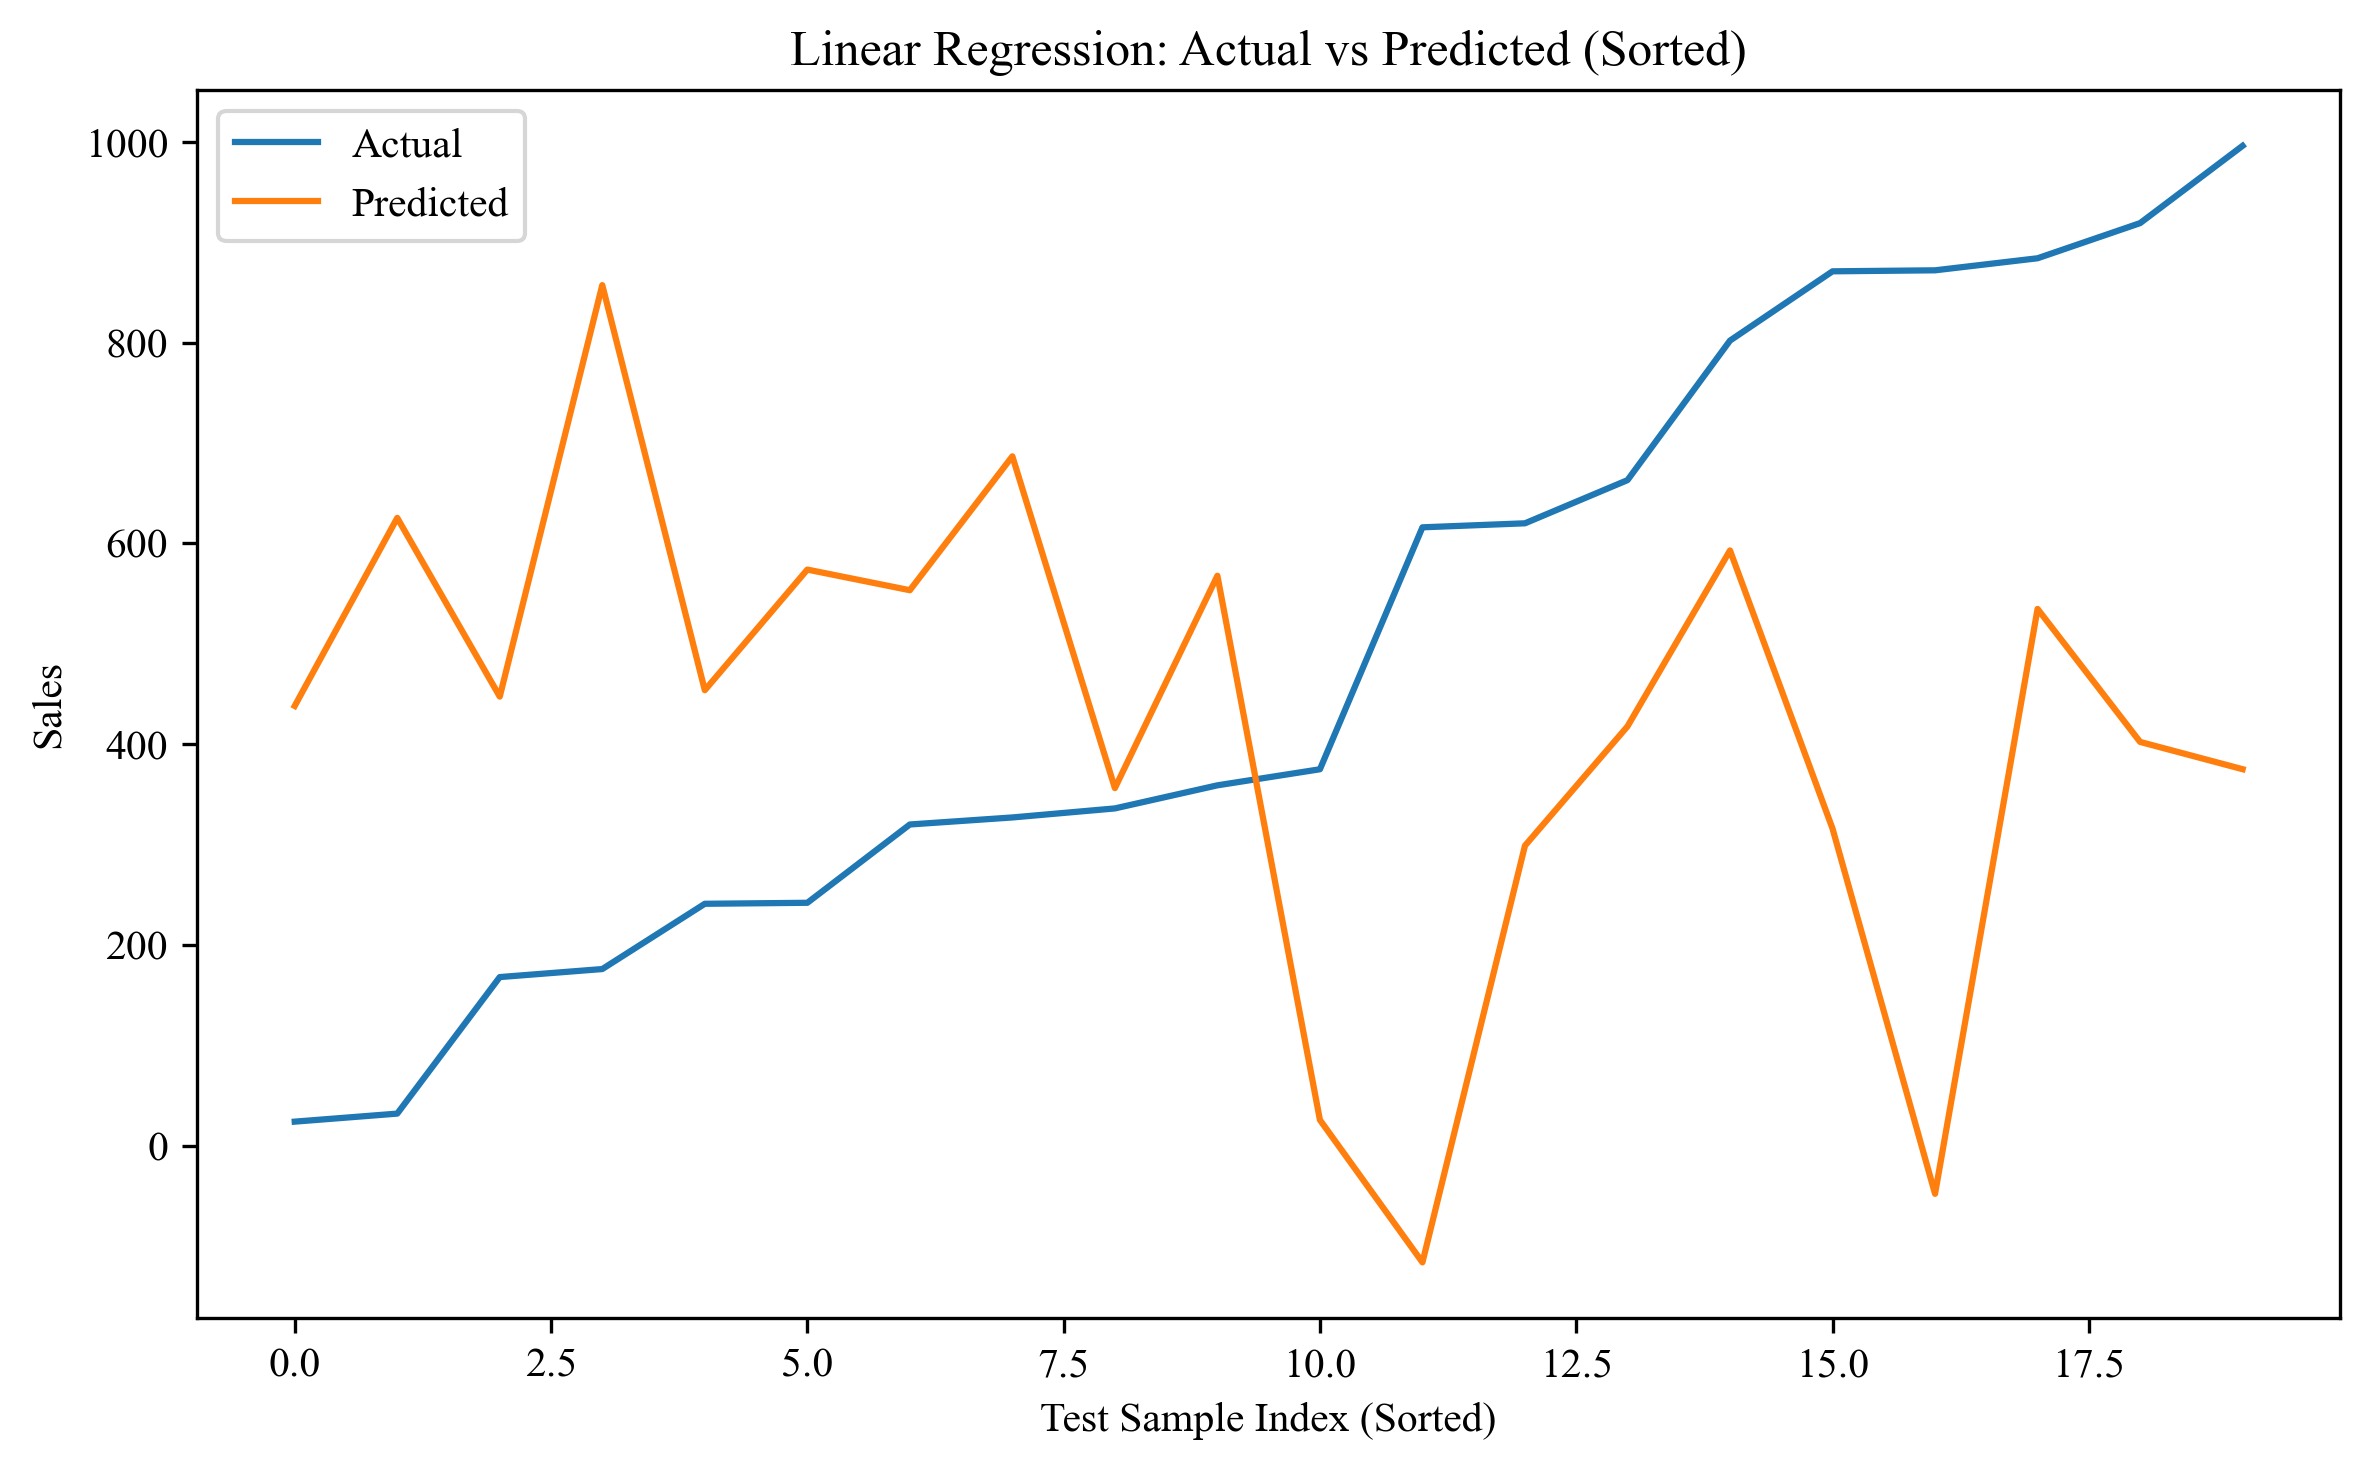

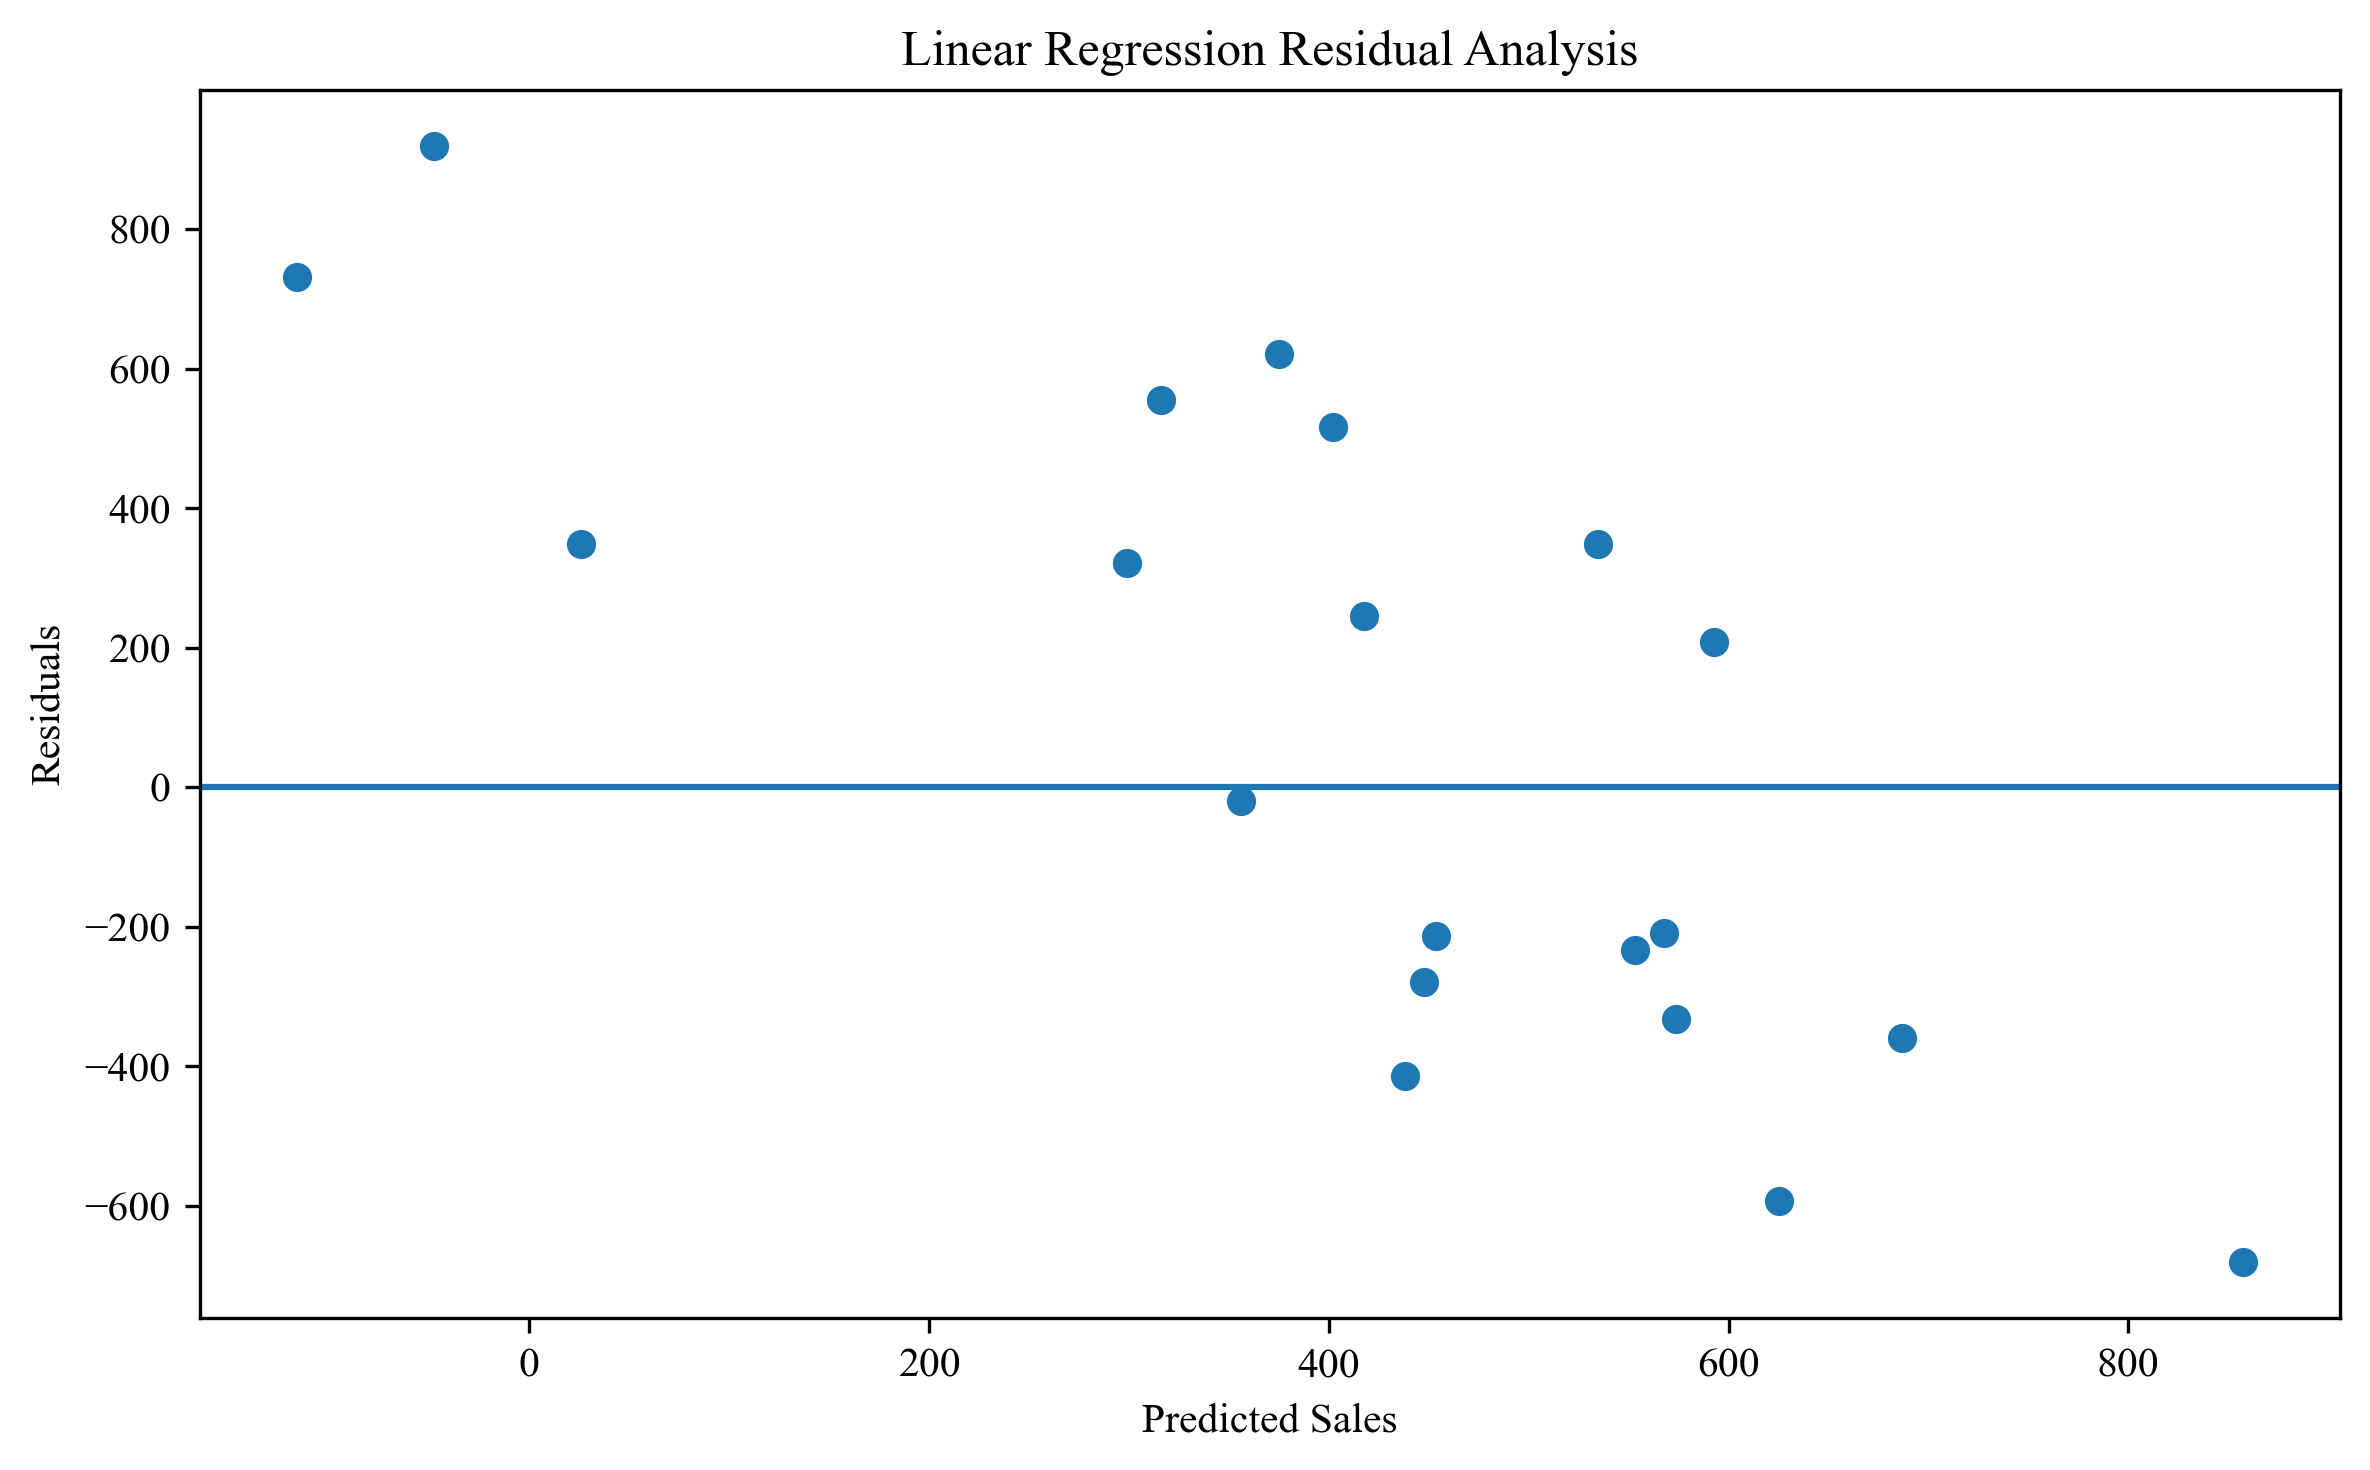

,Model,MAE,RMSE,R2 Score
0,Linear Regression,407.689198,460.601609,-1.2231


In [30]:
# ==============================================================
# Optimized Linear Regression Implementation
# ==============================================================

# Initialize model
lr_model = LinearRegression()

# Train model
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_scaled)

# --------------------------------------------------------------
# Evaluation Metrics
# --------------------------------------------------------------

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance")
print("-" * 40)
print(f"MAE  : {mae_lr:.4f}")
print(f"RMSE : {rmse_lr:.4f}")
print(f"R²   : {r2_lr:.4f}")

# --------------------------------------------------------------
# Visualization 1: Sorted Line Comparison
# --------------------------------------------------------------

comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred_lr
}).sort_values(by="Actual").reset_index(drop=True)

plt.figure(figsize=(8,5))
plt.plot(comparison_df["Actual"].values)
plt.plot(comparison_df["Predicted"].values)

plt.xlabel("Test Sample Index (Sorted)")
plt.ylabel("Sales")
plt.title("Linear Regression: Actual vs Predicted (Sorted)")
plt.legend(["Actual", "Predicted"])
plt.tight_layout()
plt.show()

# --------------------------------------------------------------
# Visualization 2: Residual Plot
# --------------------------------------------------------------

residuals = y_test - y_pred_lr

plt.figure(figsize=(8,5))
plt.scatter(y_pred_lr, residuals)

plt.axhline(y=0)
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Linear Regression Residual Analysis")
plt.tight_layout()
plt.show()

# --------------------------------------------------------------
# Store results for later comparison
# --------------------------------------------------------------

results = pd.DataFrame({
    "Model": ["Linear Regression"],
    "MAE": [mae_lr],
    "RMSE": [rmse_lr],
    "R2 Score": [r2_lr]
})

results


<div style="font-family: 'Times New Roman';">

<h2 style="font-size:24px; font-style:italic;">
Limitations of Linear Regression for This Dataset
</h2>

<p style="font-size:20px; line-height:1.6;">
The baseline Linear Regression model did not perform satisfactorily for the supply chain dataset.
Although the implementation was technically correct, the model exhibited significant prediction errors.
</p>

<p style="font-size:20px; line-height:1.6;">
Key issues observed:
</p>

<p style="font-size:20px; line-height:1.6;">
• High residual variance across prediction range<br>
• Presence of negative predictions<br>
• Inability to capture non-linear relationships<br>
• Underfitting behaviour in high-demand regions<br>
• Violation of homoscedasticity assumption
</p>

<p style="font-size:20px; line-height:1.6;">
Supply chain demand patterns are influenced by complex interactions between price,
stock levels, manufacturing cost, lead time, and supplier characteristics.
Linear Regression assumes a strictly linear relationship and therefore fails
to model these complex interactions effectively.
</p>

<p style="font-size:20px; line-height:1.6;">
Hence, a more flexible non-linear model is required.
</p>

</div>


<div style="font-family: 'Times New Roman';">

<h2 style="font-size:24px; font-style:italic;">
Limitations of Linear Regression for This Dataset
</h2>

<p style="font-size:20px; line-height:1.6;">
The baseline Linear Regression model did not perform satisfactorily for the supply chain dataset.
Although the implementation was technically correct, the model exhibited significant prediction errors.
</p>

<p style="font-size:20px; line-height:1.6;">
Key issues observed:
</p>

<p style="font-size:20px; line-height:1.6;">
• High residual variance across prediction range<br>
• Presence of negative predictions<br>
• Inability to capture non-linear relationships<br>
• Underfitting behaviour in high-demand regions<br>
• Violation of homoscedasticity assumption
</p>

<p style="font-size:20px; line-height:1.6;">
Supply chain demand patterns are influenced by complex interactions between price,
stock levels, manufacturing cost, lead time, and supplier characteristics.
Linear Regression assumes a strictly linear relationship and therefore fails
to model these complex interactions effectively.
</p>

<p style="font-size:20px; line-height:1.6;">
Hence, a more flexible non-linear model is required.
</p>

</div>


In [31]:
# ==============================================================
# Advanced Model: Random Forest Regressor
# ==============================================================

# Initialize Random Forest with controlled complexity
rf_model = RandomForestRegressor(
    n_estimators=300,        # Number of trees in the forest
    max_depth=12,            # Limits tree depth to prevent overfitting
    min_samples_split=5,     # Minimum samples required to split a node
    min_samples_leaf=3,      # Minimum samples required at leaf node
    random_state=42,
    n_jobs=-1                # Use all CPU cores for faster computation
)

# Train the model on training data (no scaling required)
rf_model.fit(X_train, y_train)

# Generate predictions on test data
y_pred_rf = rf_model.predict(X_test)

# --------------------------------------------------------------
# Model Evaluation
# --------------------------------------------------------------

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model Performance")
print("-" * 45)
print(f"MAE  : {mae_rf:.4f}")
print(f"RMSE : {rmse_rf:.4f}")
print(f"R²   : {r2_rf:.4f}")

# --------------------------------------------------------------
# Overfitting Check
# --------------------------------------------------------------

train_r2 = rf_model.score(X_train, y_train)
test_r2 = rf_model.score(X_test, y_test)

print("\nModel Generalization Check")
print("-" * 45)
print(f"Train R² : {train_r2:.4f}")
print(f"Test R²  : {test_r2:.4f}")

# --------------------------------------------------------------
# Feature Importance Analysis
# --------------------------------------------------------------

importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display top 10 features
importance_df.head(10)


Random Forest Model Performance
---------------------------------------------
MAE  : 350.7665
RMSE : 394.9765
R²   : -0.6347

Model Generalization Check
---------------------------------------------
Train R² : 0.7582
Test R²  : -0.6347


,Feature,Importance
18,Shipping carriers_Carrier C,0.173502
8,Production volumes,0.156167
1,Availability,0.078346
7,Lead time,0.060966
10,Manufacturing costs,0.054456
2,Stock levels,0.054232
9,Manufacturing lead time,0.051607
0,Price,0.044018
24,Location_Delhi,0.043255
11,Defect rates,0.040022


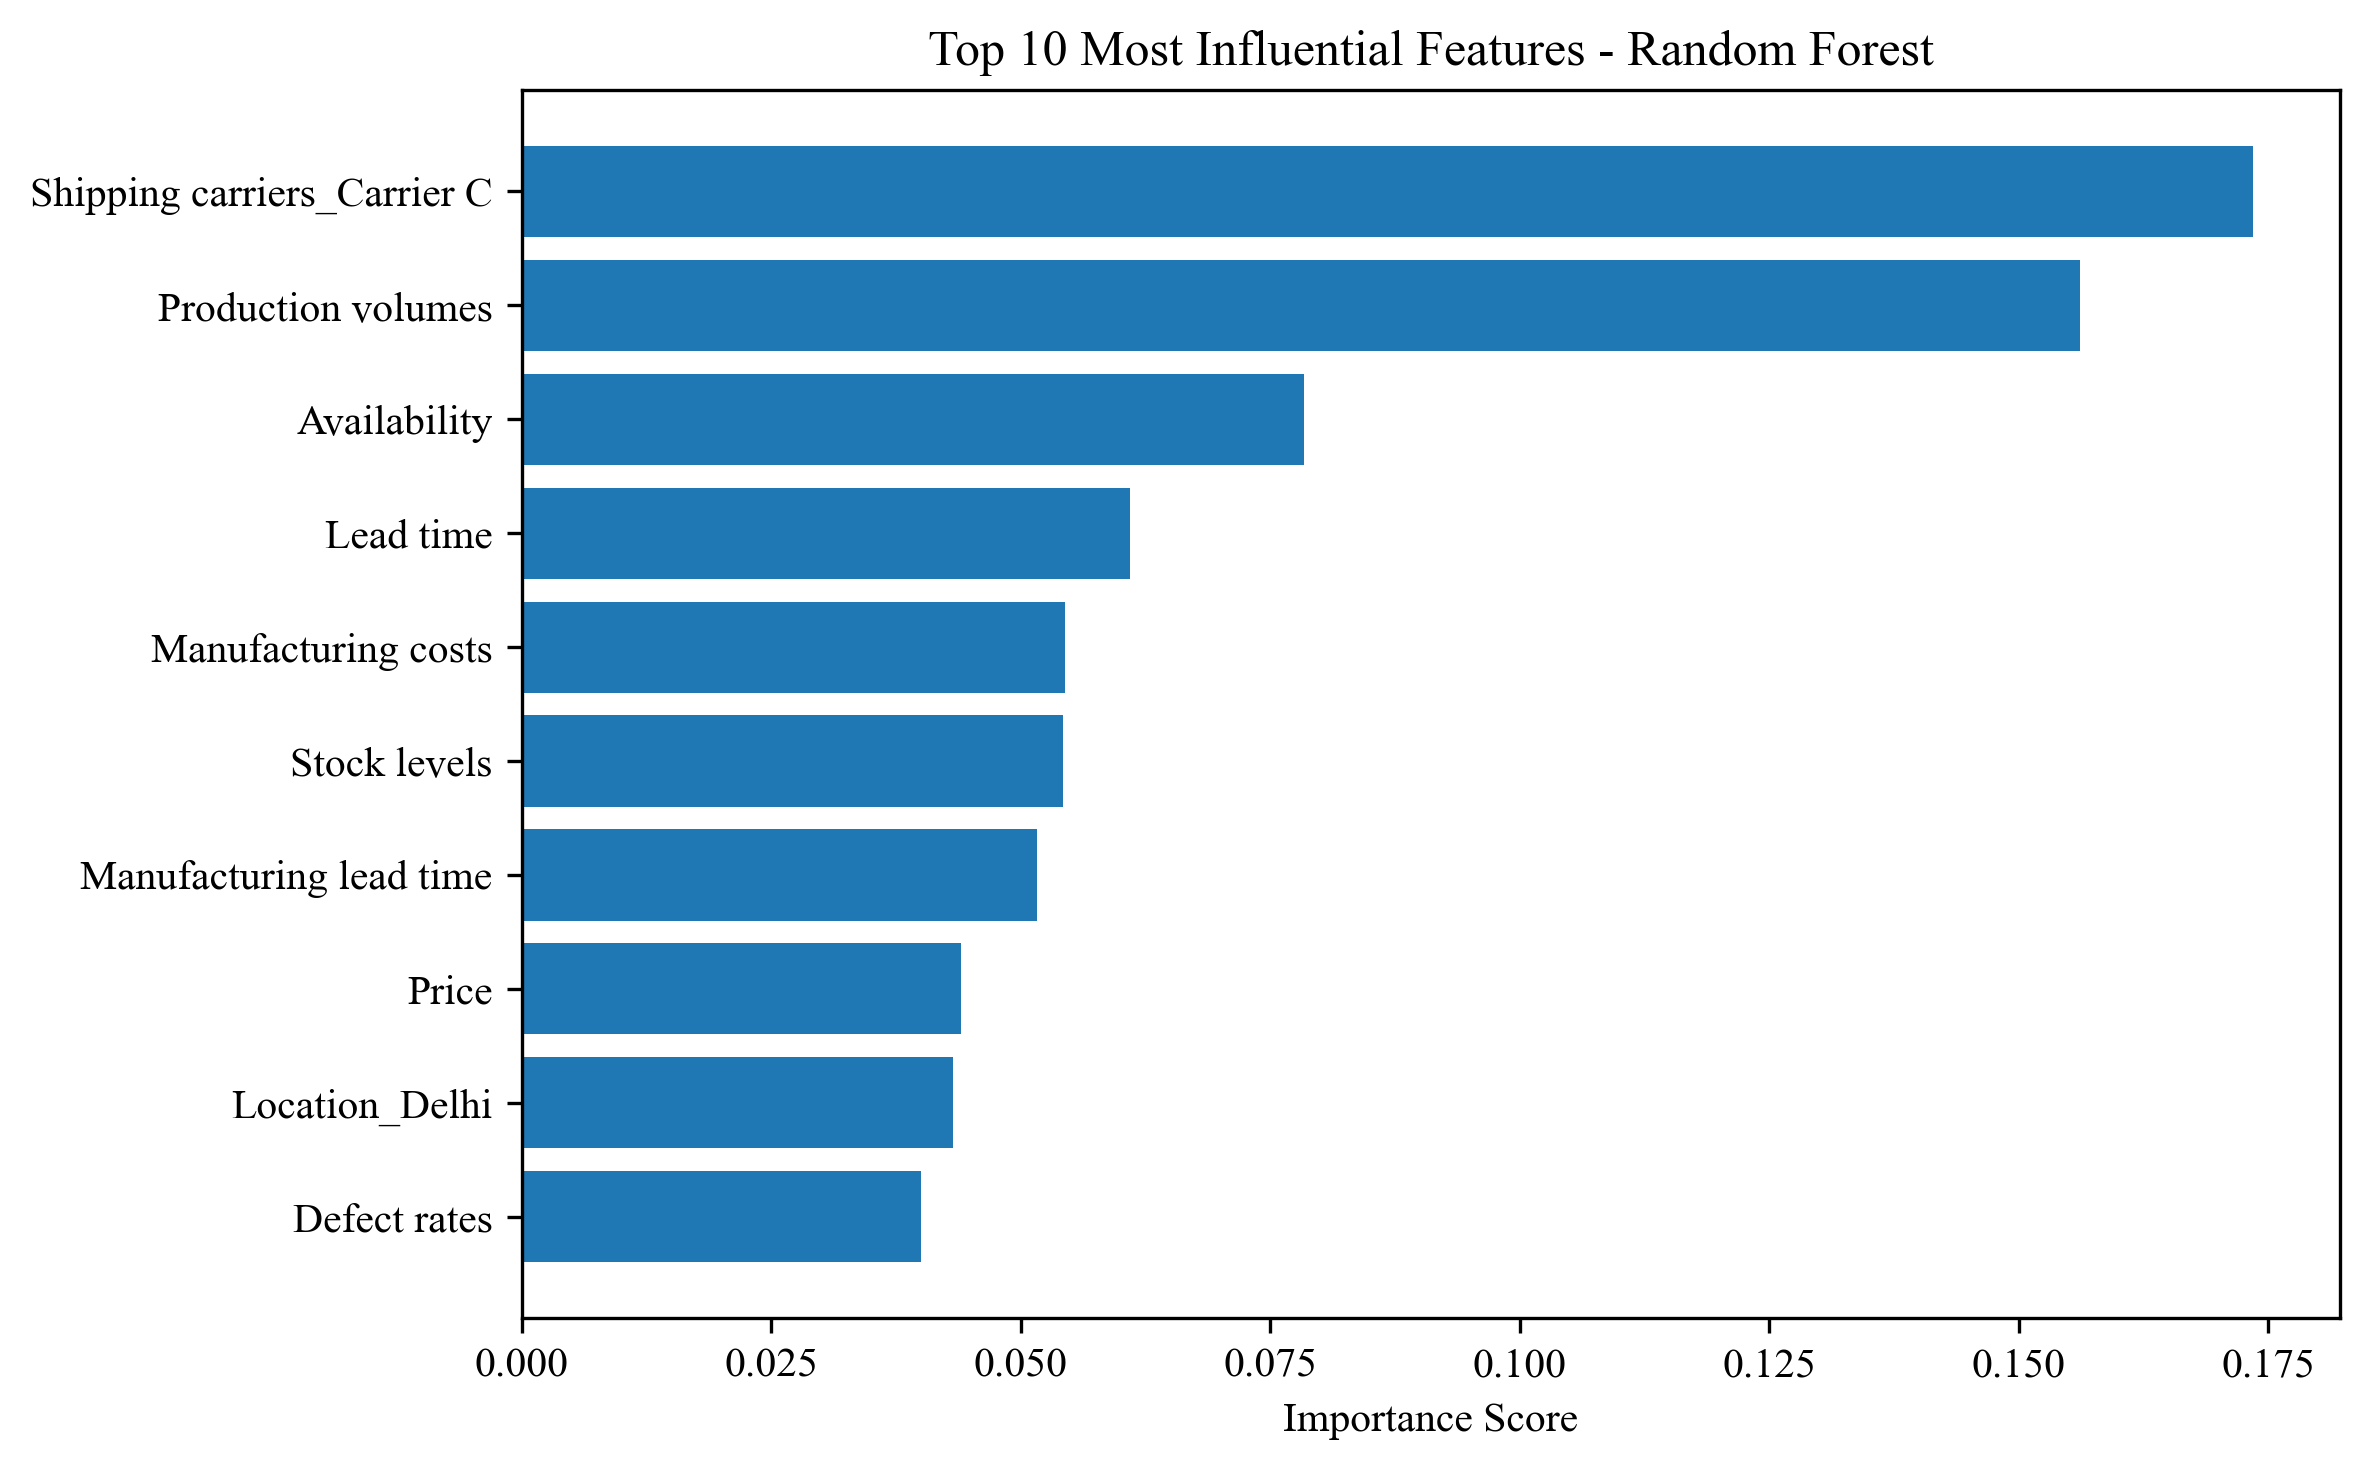

In [32]:
top_features = importance_df.head(10)

plt.figure(figsize=(8,5))
plt.barh(top_features["Feature"], top_features["Importance"])
plt.gca().invert_yaxis()

plt.xlabel("Importance Score")
plt.title("Top 10 Most Influential Features - Random Forest")
plt.tight_layout()
plt.show()


Model Performance Summary
--------------------------------------------------
               Model         MAE        RMSE  R2 Score
0  Linear Regression  407.689198  460.601609 -1.223100
1      Random Forest  350.766506  394.976536 -0.634748


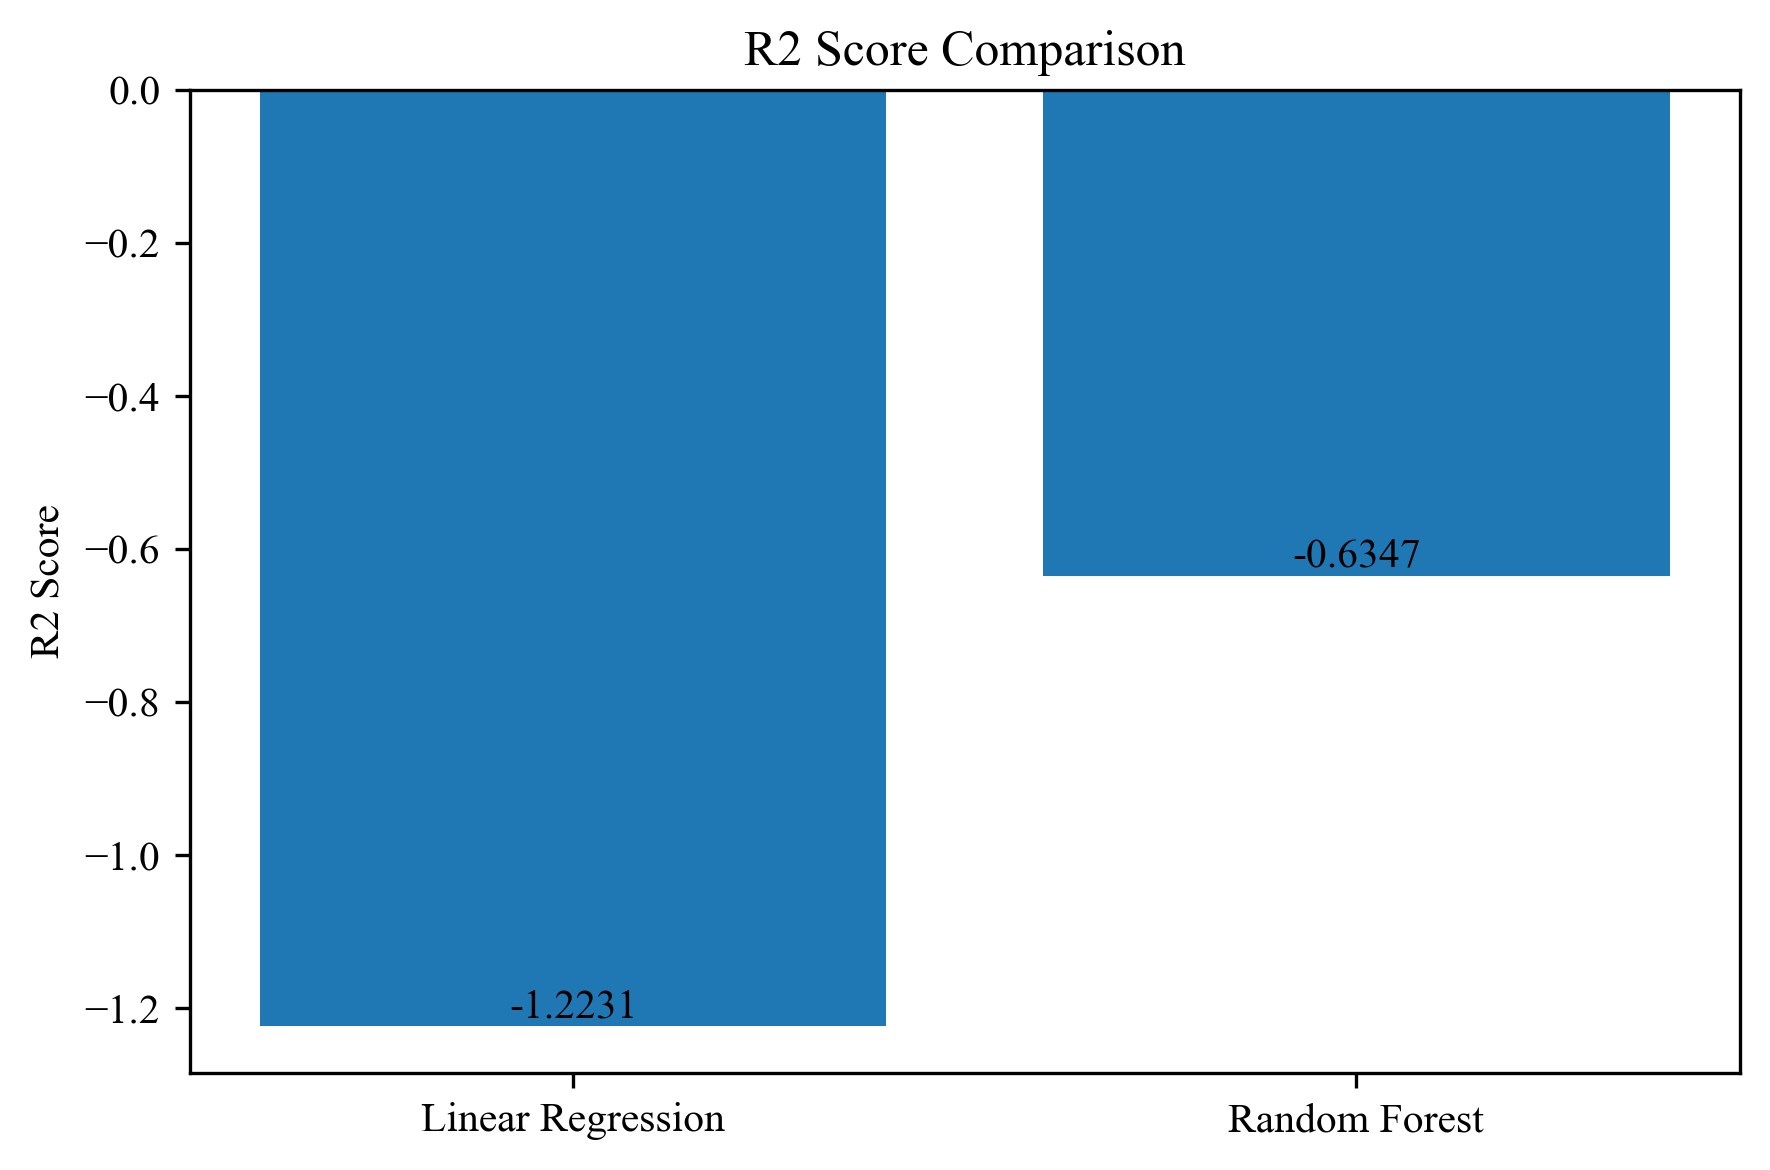

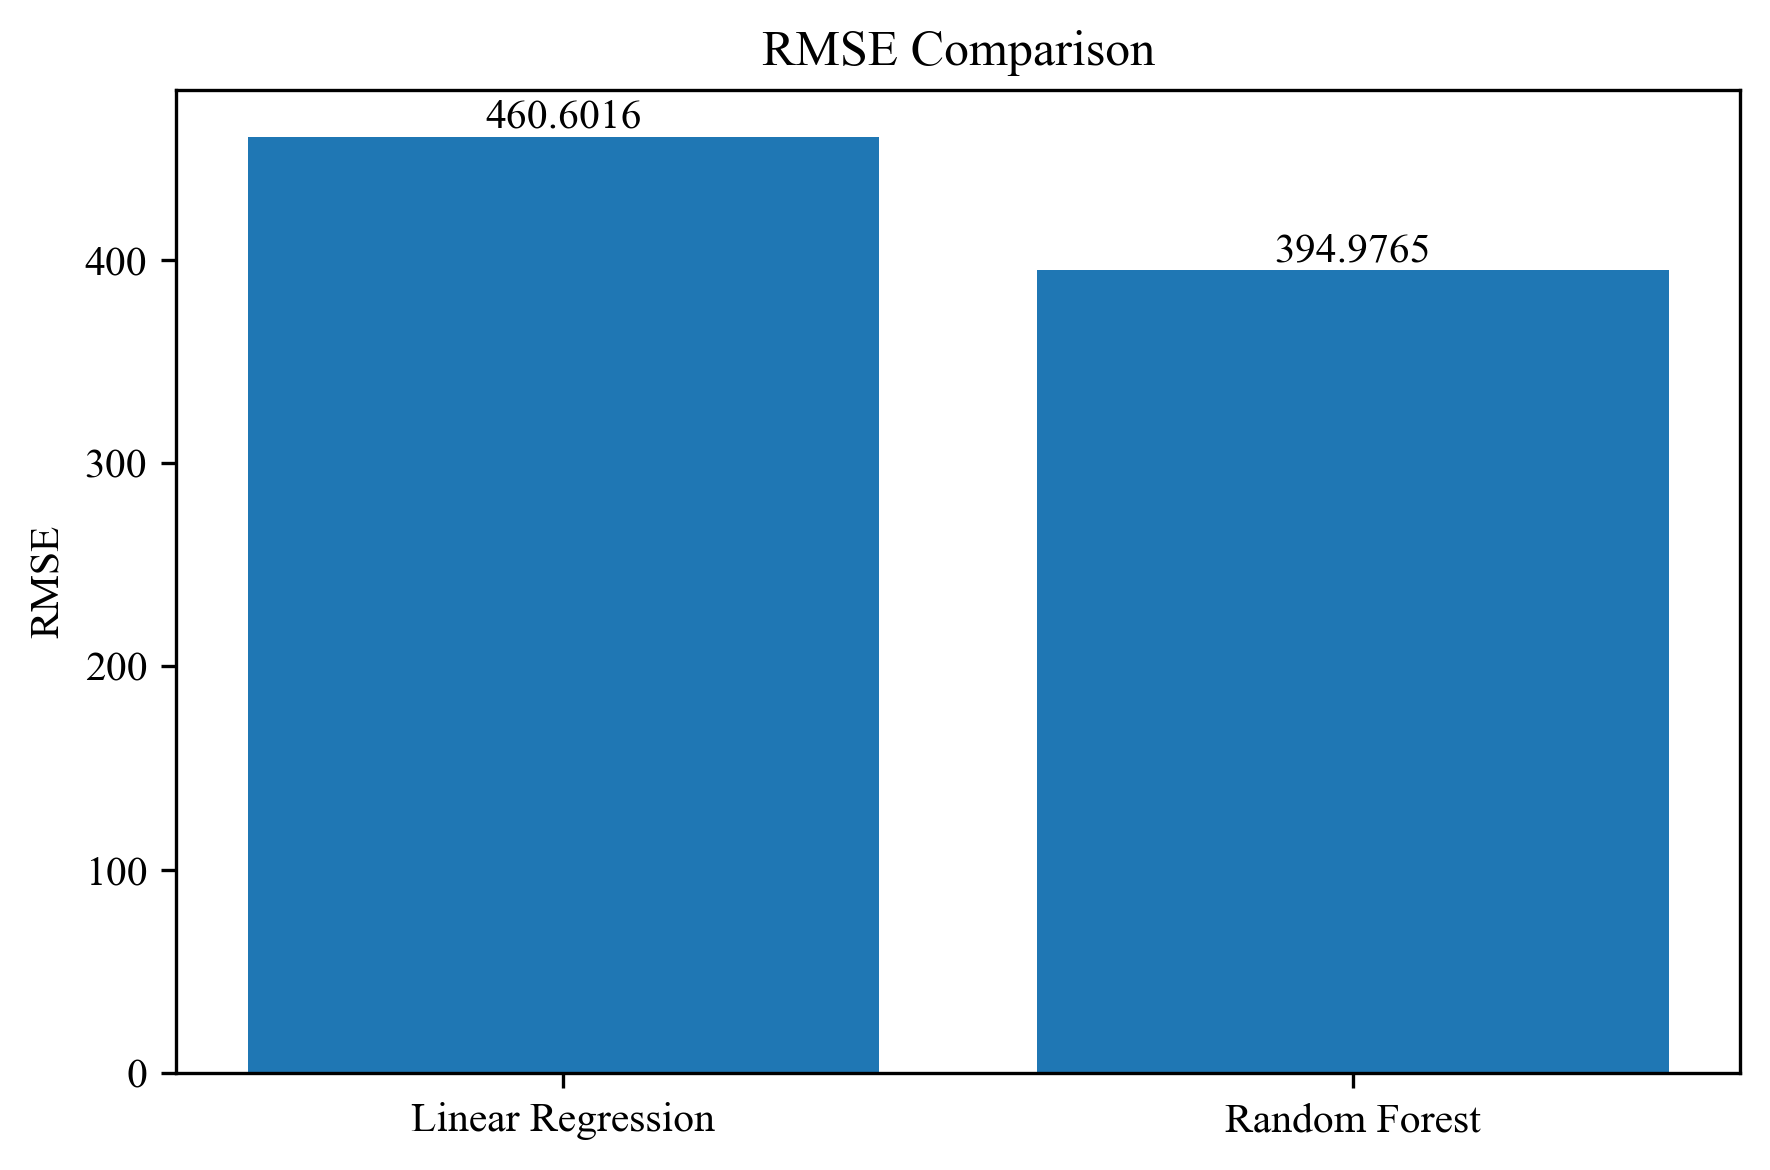

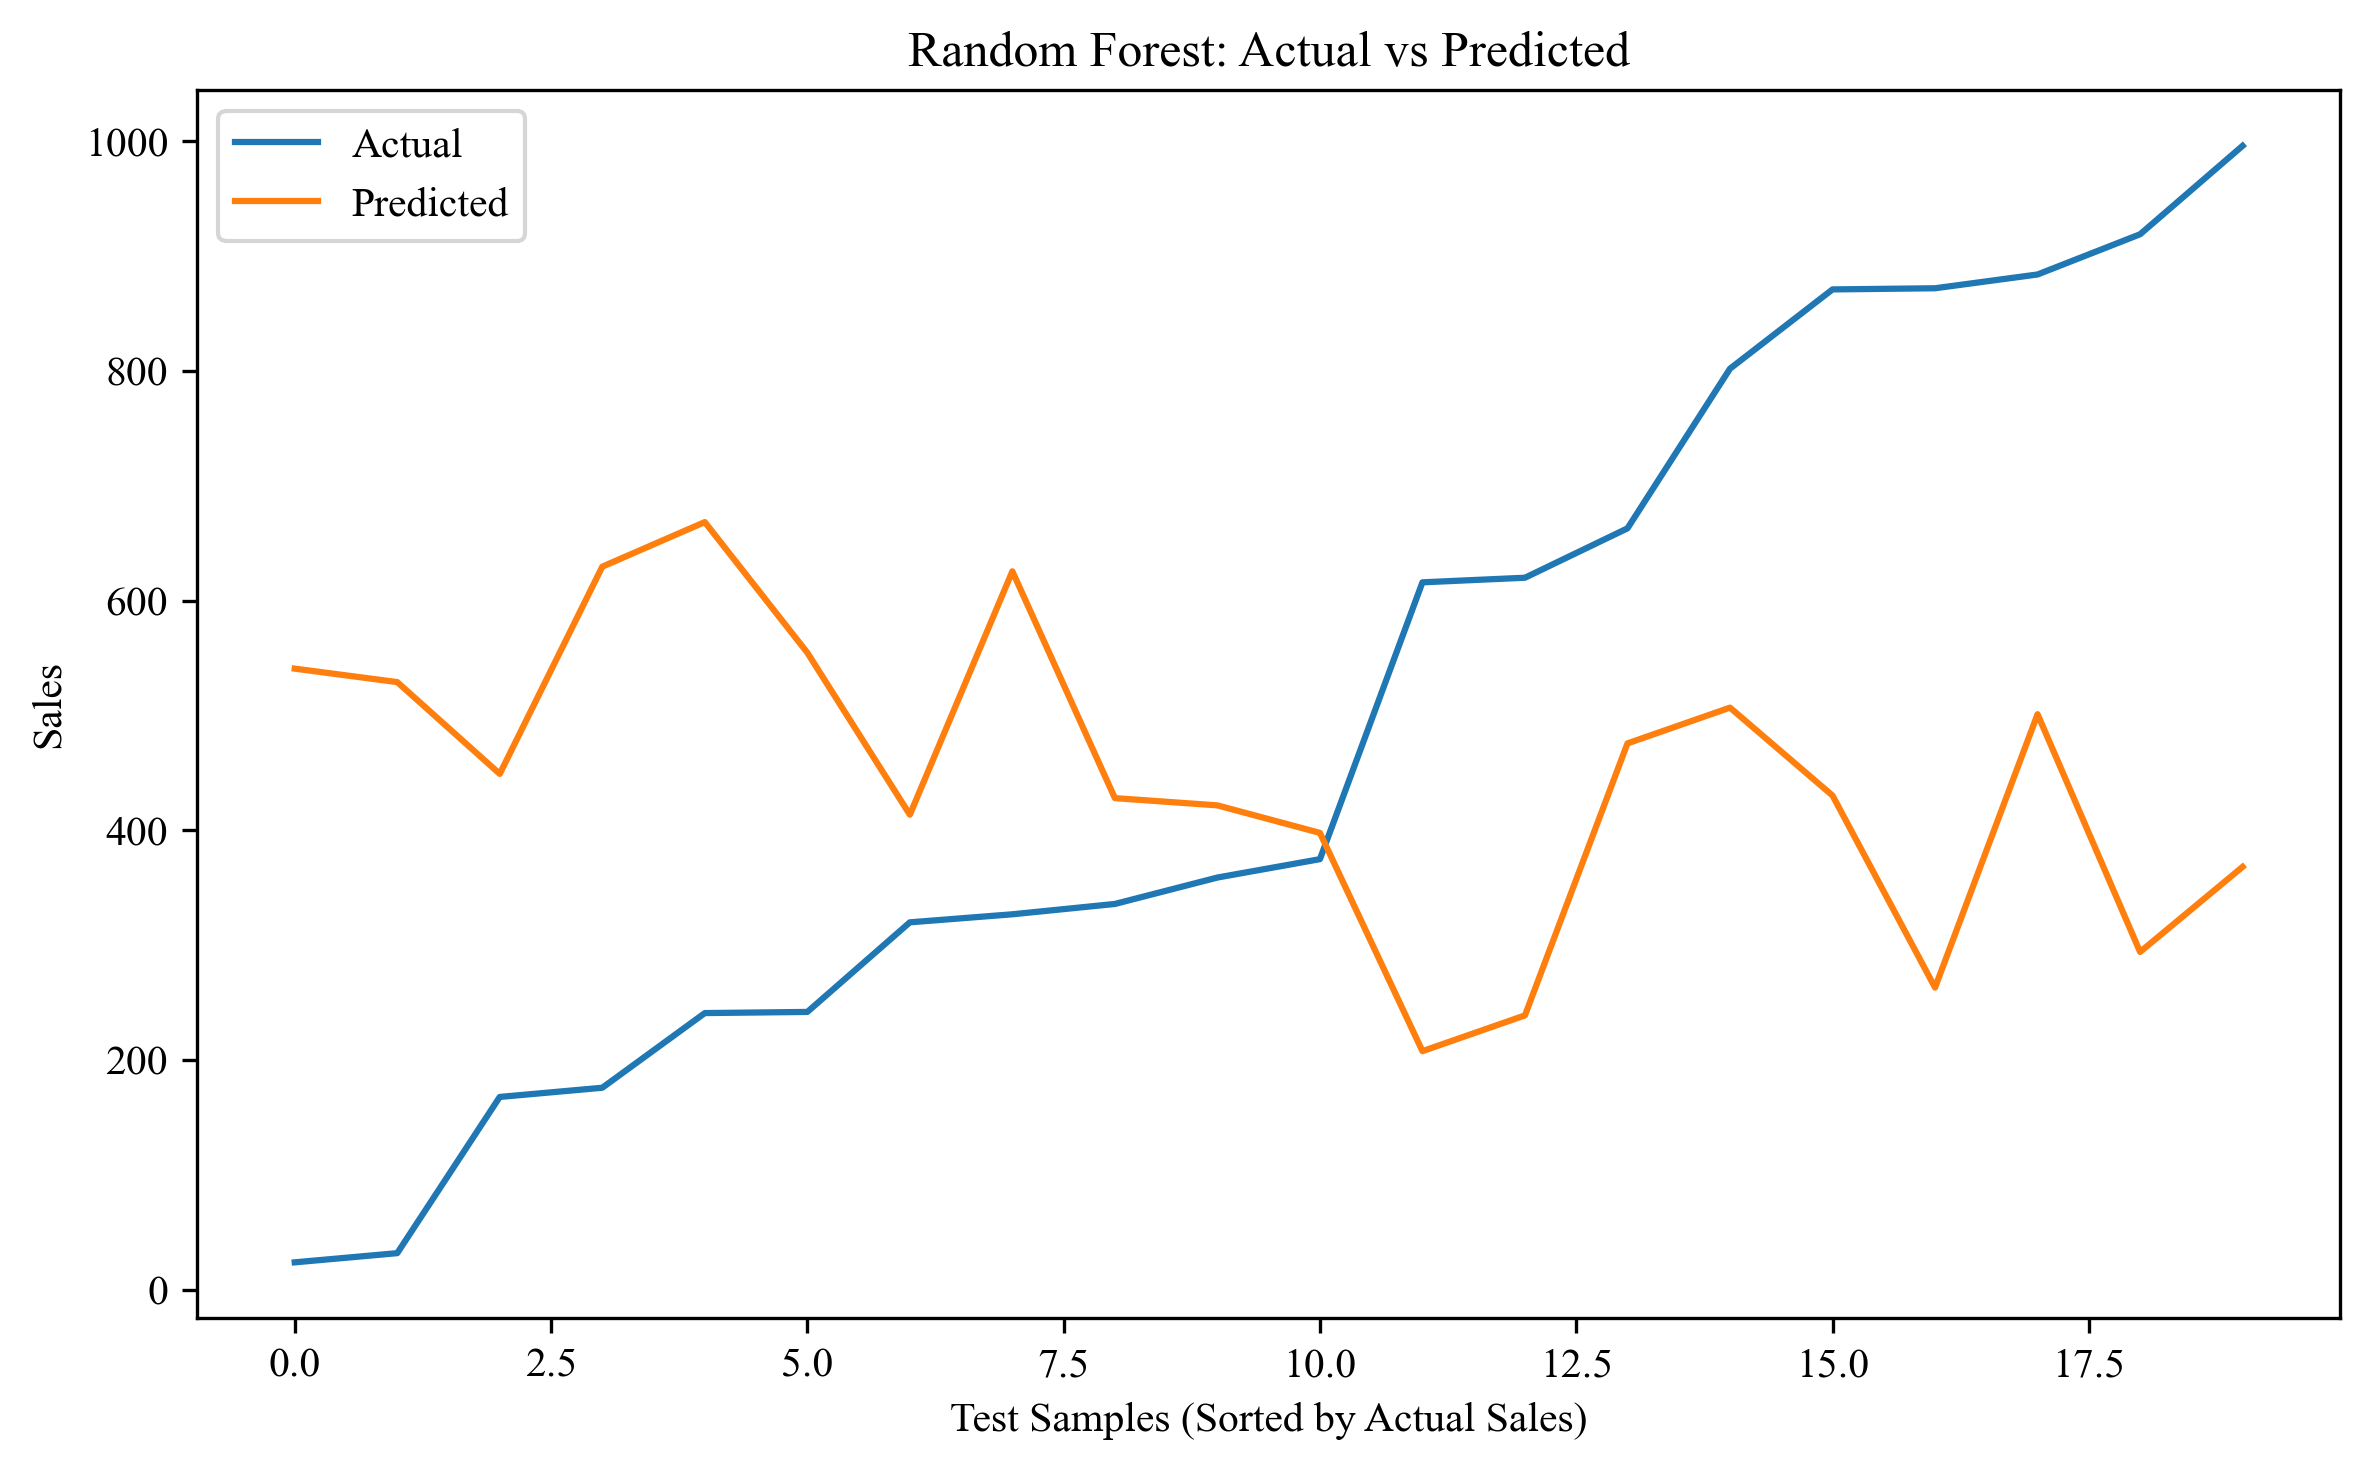

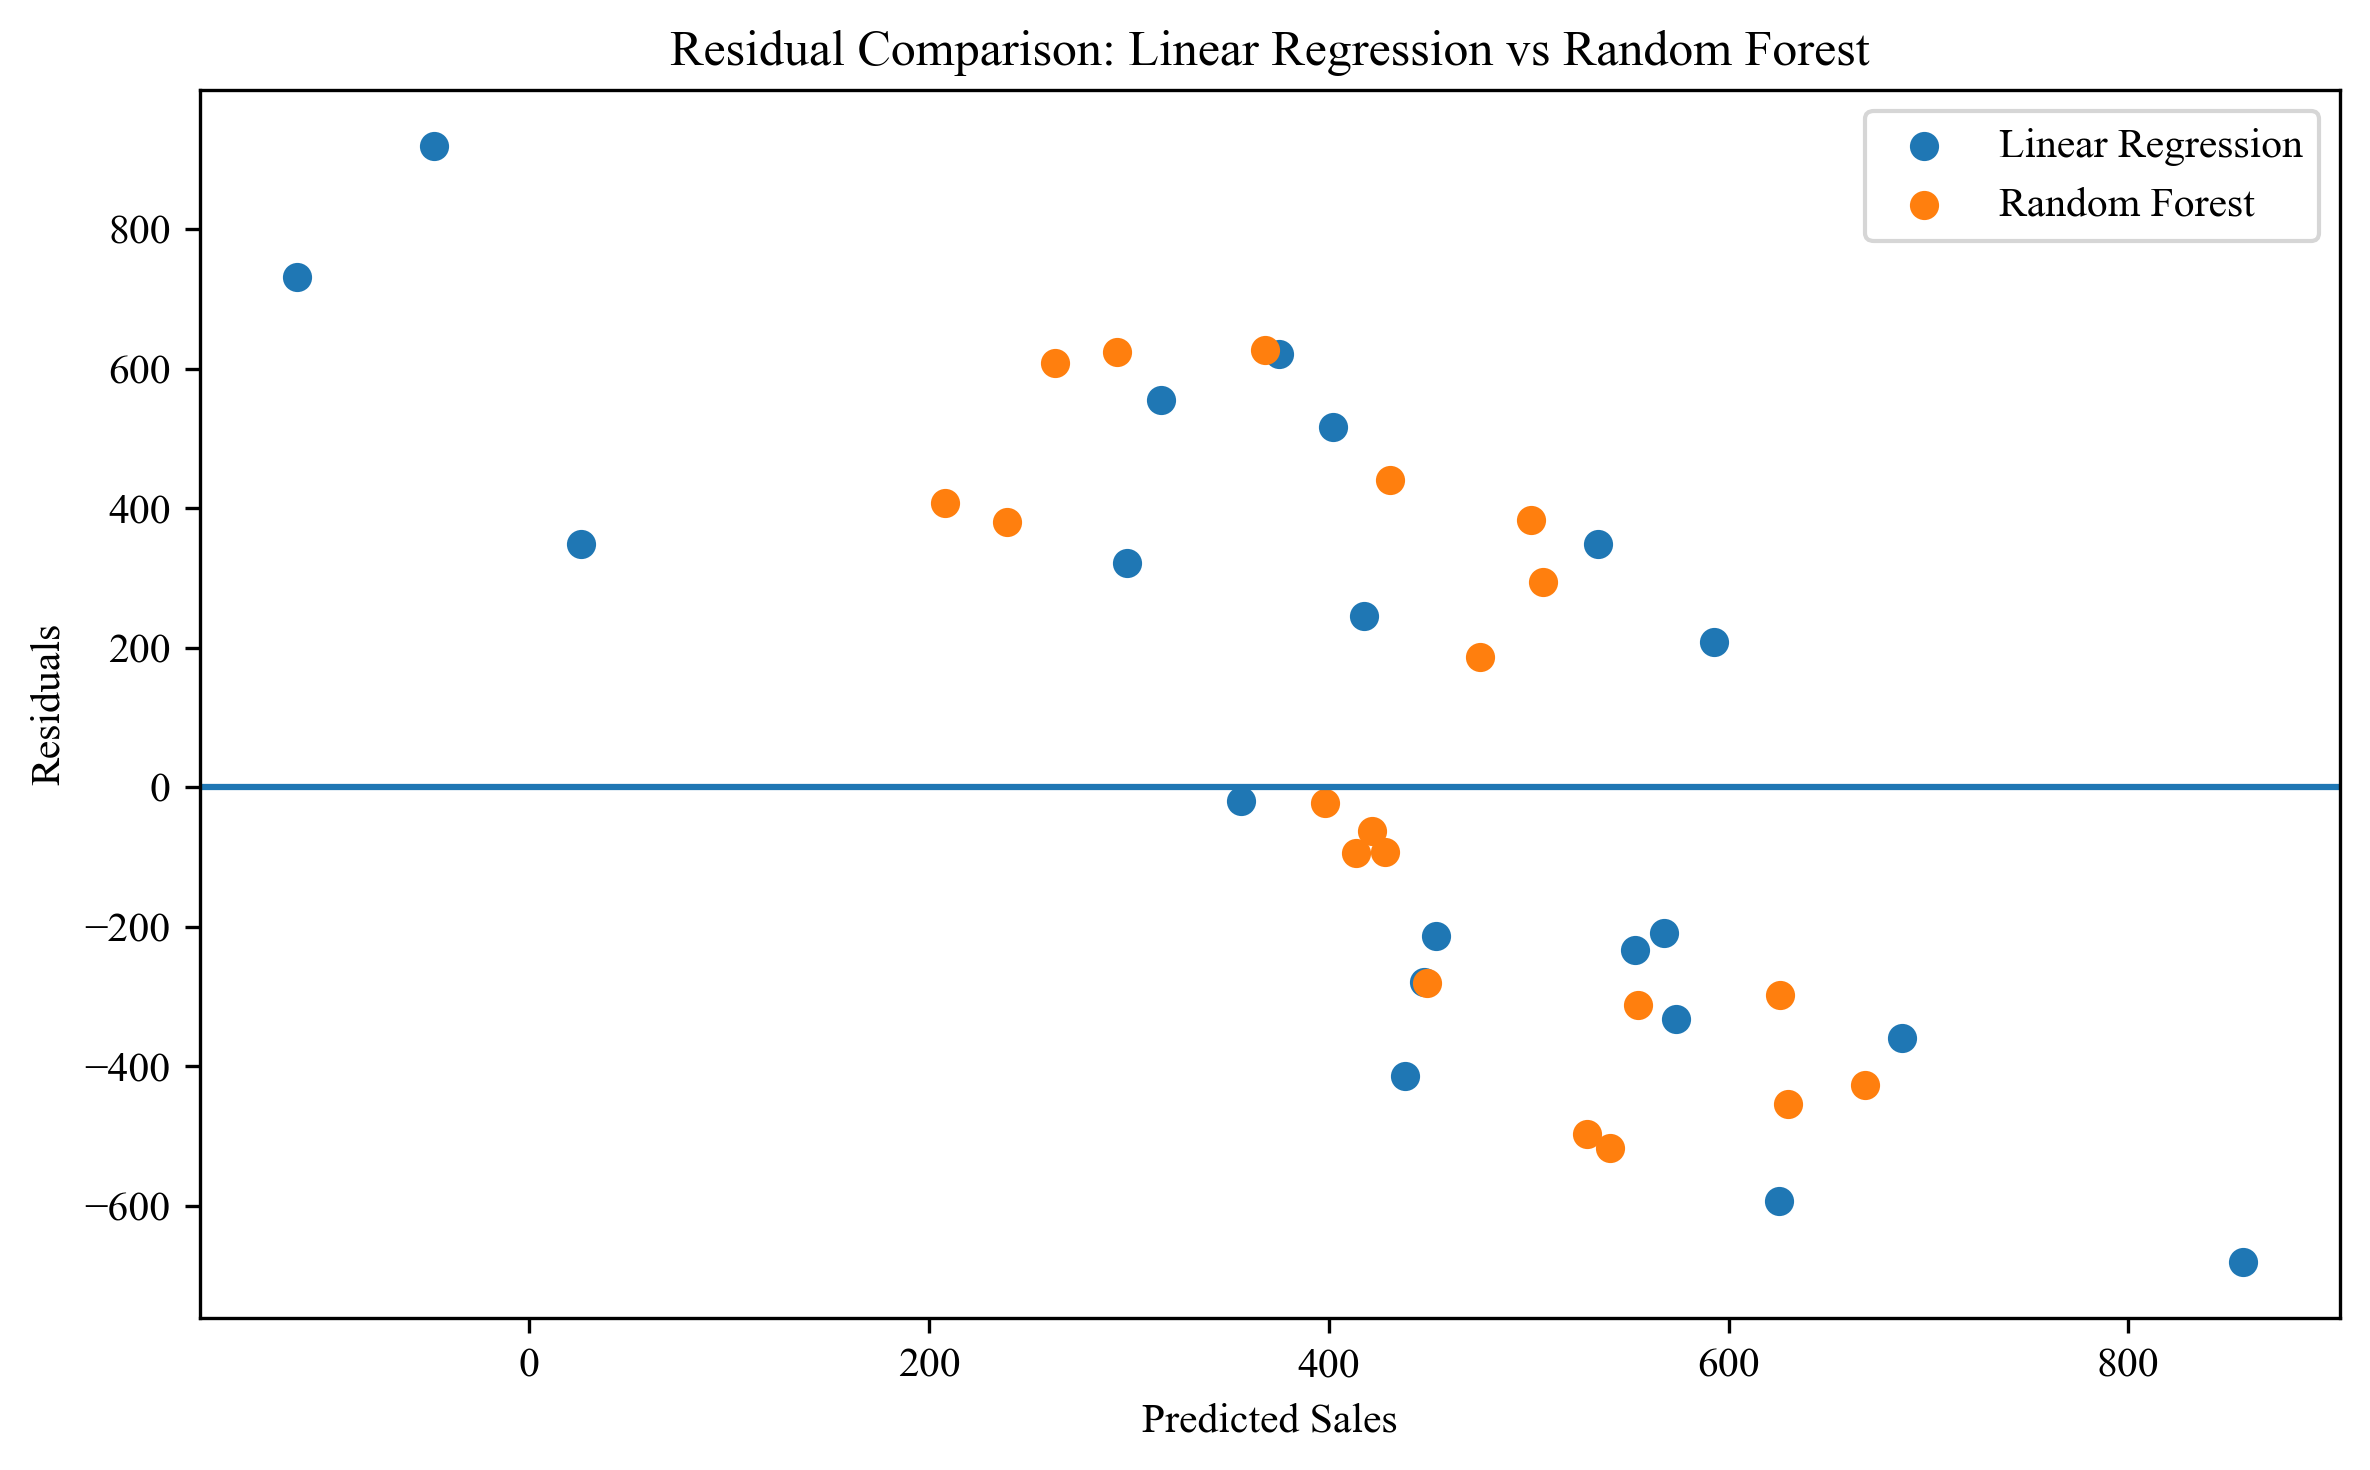

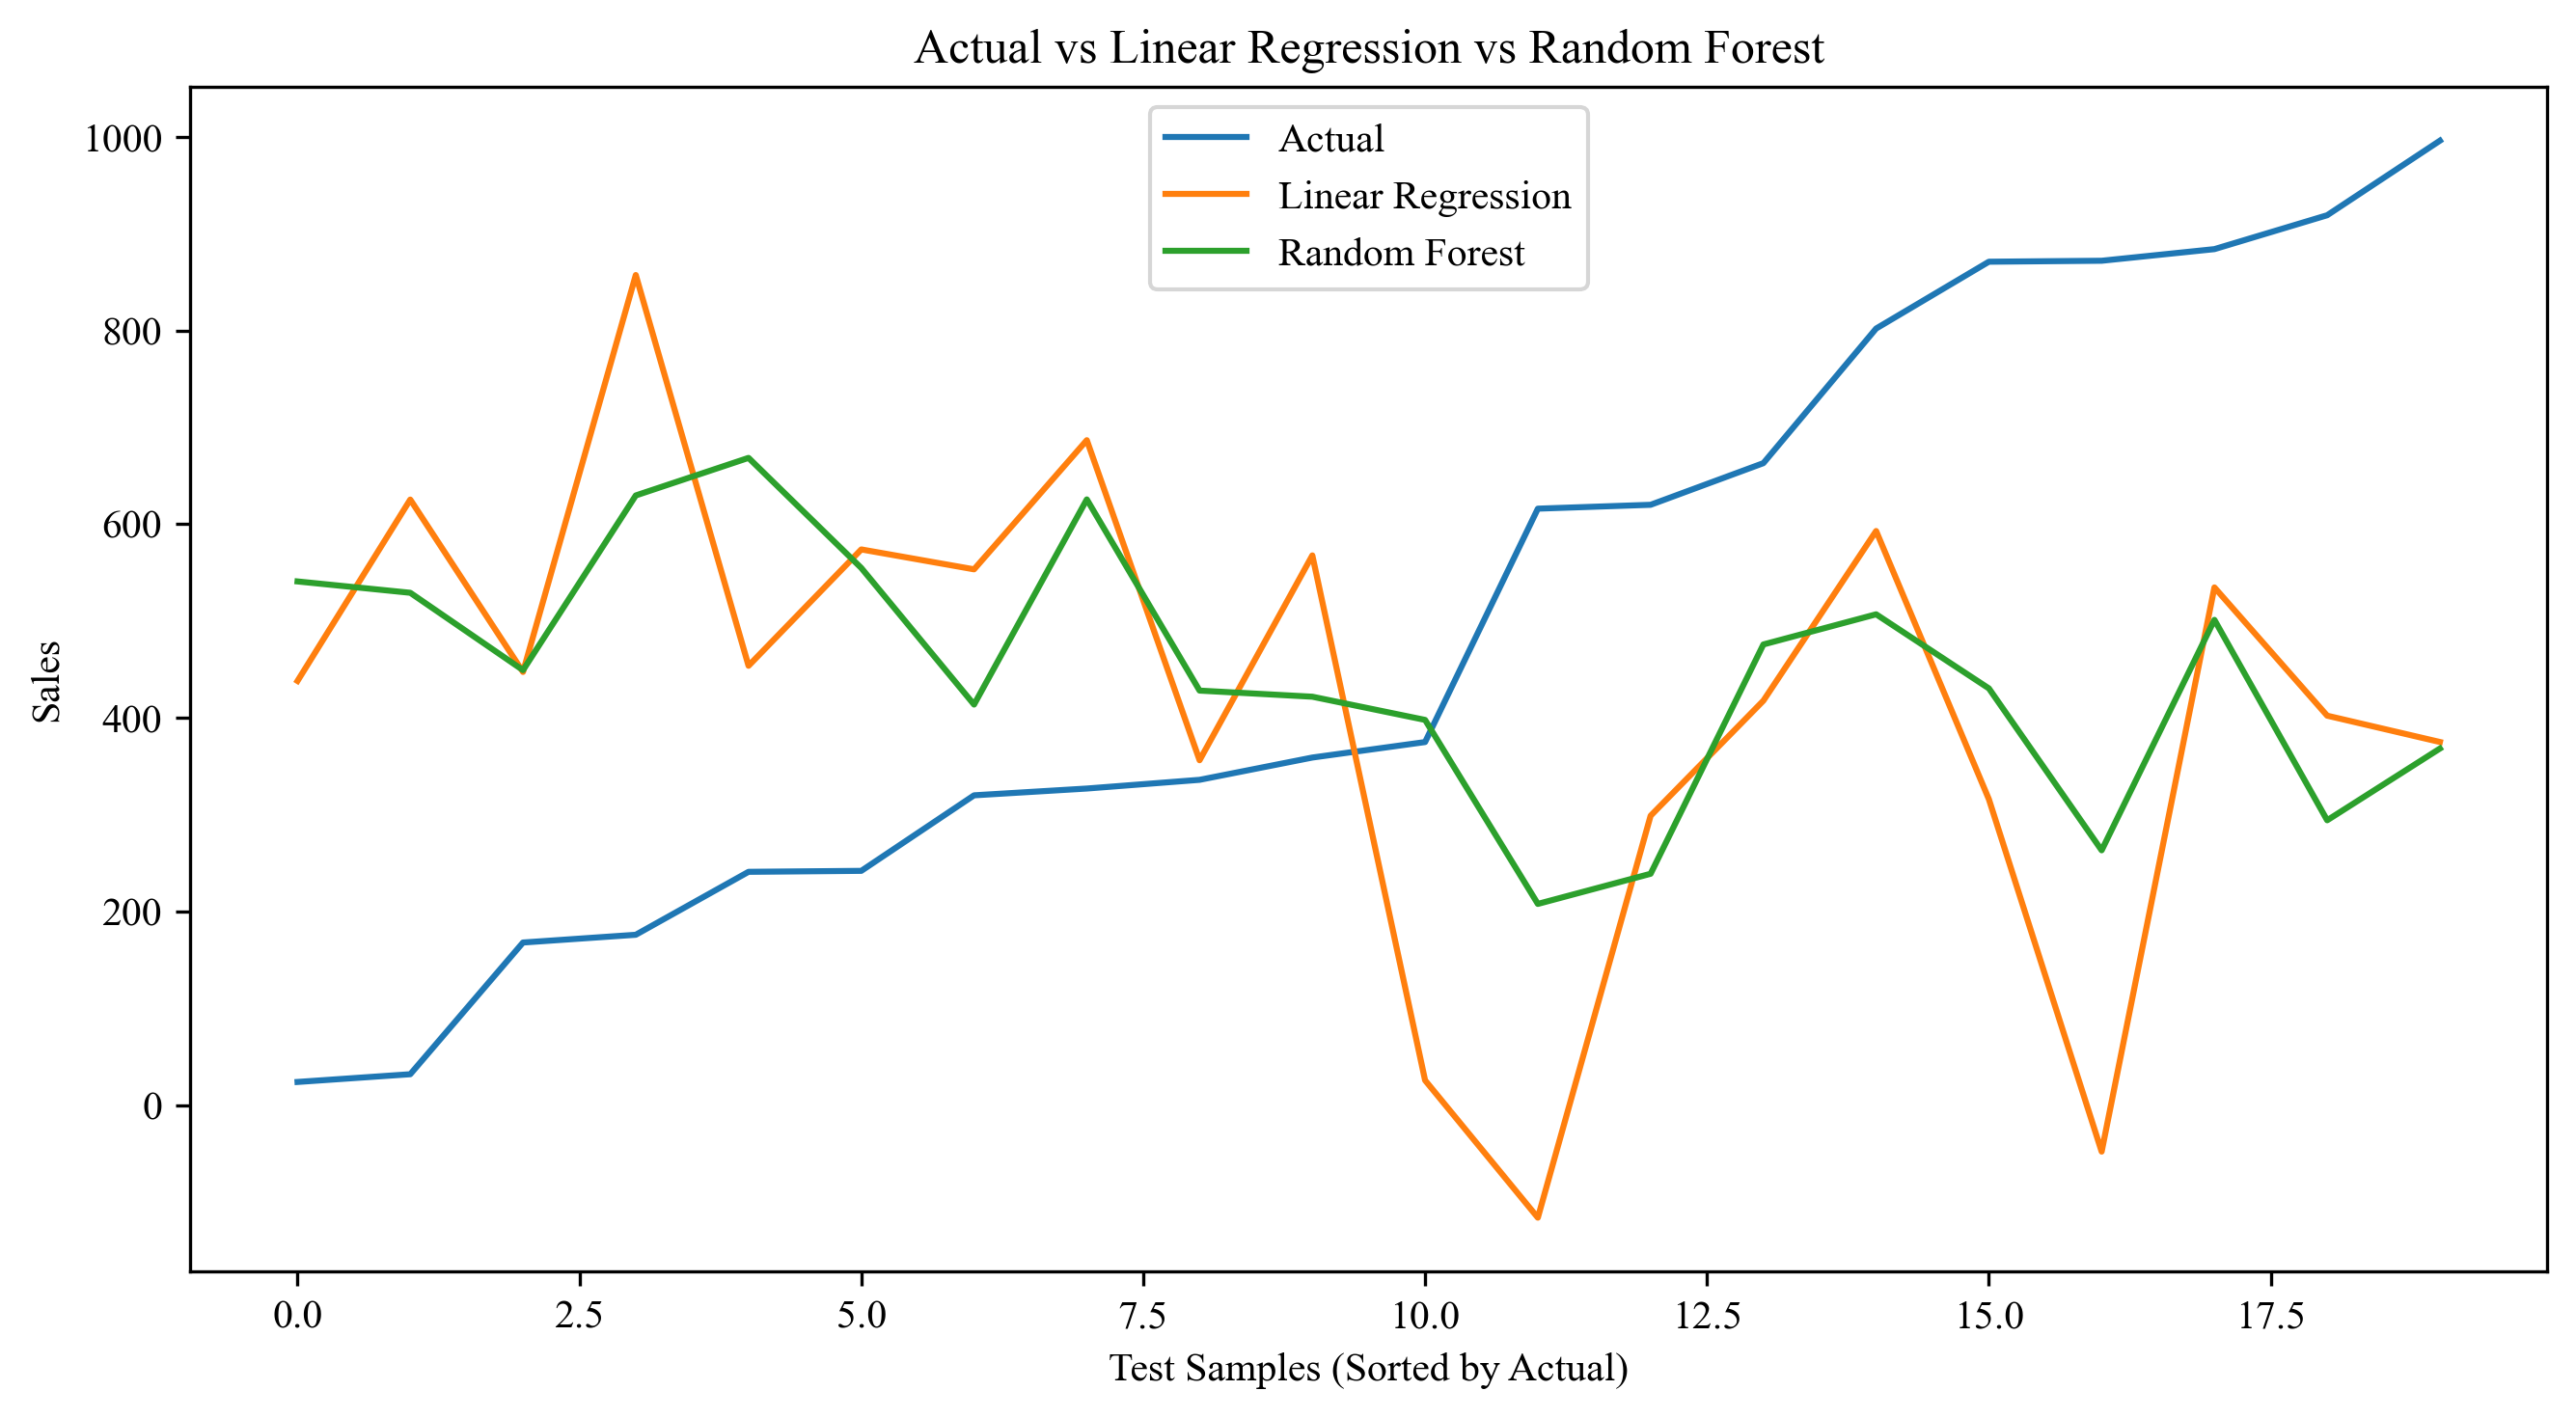

In [35]:
# ==============================================================
# Model Performance Comparison and Visualization
# ==============================================================

# Create comparison dataframe
comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lr, mae_rf],
    "RMSE": [rmse_lr, rmse_rf],
    "R2 Score": [r2_lr, r2_rf]
})

print("Model Performance Summary")
print("-" * 50)
print(comparison_df)


# --------------------------------------------------------------
# 1. R2 Score Comparison
# --------------------------------------------------------------

plt.figure(figsize=(6,4))
bars = plt.bar(comparison_df["Model"], comparison_df["R2 Score"])

plt.ylabel("R2 Score")
plt.title("R2 Score Comparison")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:.4f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


# --------------------------------------------------------------
# 2. RMSE Comparison
# --------------------------------------------------------------

plt.figure(figsize=(6,4))
bars = plt.bar(comparison_df["Model"], comparison_df["RMSE"])

plt.ylabel("RMSE")
plt.title("RMSE Comparison")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:.4f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


# --------------------------------------------------------------
# 3. Random Forest - Sorted Line Comparison
# --------------------------------------------------------------

rf_sorted = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted_RF": y_pred_rf
}).sort_values(by="Actual").reset_index(drop=True)

plt.figure(figsize=(8,5))
plt.plot(rf_sorted["Actual"].values)
plt.plot(rf_sorted["Predicted_RF"].values)

plt.xlabel("Test Samples (Sorted by Actual Sales)")
plt.ylabel("Sales")
plt.title("Random Forest: Actual vs Predicted")
plt.legend(["Actual", "Predicted"])
plt.tight_layout()
plt.show()


# --------------------------------------------------------------
# 4. Residual Comparison
# --------------------------------------------------------------

residuals_lr = y_test - y_pred_lr
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(8,5))
plt.scatter(y_pred_lr, residuals_lr)
plt.scatter(y_pred_rf, residuals_rf)

plt.axhline(y=0)
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Comparison: Linear Regression vs Random Forest")
plt.legend(["Linear Regression", "Random Forest"])
plt.tight_layout()
plt.show()
# Create sorted comparison dataframe
comparison_full = pd.DataFrame({
    "Actual": y_test.values,
    "Linear Regression": y_pred_lr,
    "Random Forest": y_pred_rf
}).sort_values(by="Actual").reset_index(drop=True)

plt.figure(figsize=(9,5))

plt.plot(comparison_full["Actual"].values)
plt.plot(comparison_full["Linear Regression"].values)
plt.plot(comparison_full["Random Forest"].values)

plt.xlabel("Test Samples (Sorted by Actual)")
plt.ylabel("Sales")
plt.title("Actual vs Linear Regression vs Random Forest")
plt.legend(["Actual", "Linear Regression", "Random Forest"])

plt.tight_layout()
plt.show()


In [39]:
# ==============================================================
# Cross Validation - Random Forest
# ==============================================================

from sklearn.model_selection import cross_val_score

rf_cv_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42,
    n_jobs=-1
)

cv_scores = cross_val_score(
    rf_cv_model,
    X_encoded,
    y,
    cv=5,
    scoring="r2"
)

print("Cross Validation R2 Scores:", cv_scores)
print("Mean R2:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross Validation R2 Scores: [-0.1696452  -0.1587073   0.01438314 -0.13422797  0.15392363]
Mean R2: -0.058854737749526854
Standard Deviation: 0.12535119046901955


In [40]:
# ==============================================================
# Hyperparameter Tuning - Random Forest
# ==============================================================

from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [200, 300],
    "max_depth": [8, 10, 12],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [2, 3]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [41]:
# Final evaluation on test data
y_pred_best = best_rf.predict(X_test)

mae_final = mean_absolute_error(y_test, y_pred_best)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_final = r2_score(y_test, y_pred_best)

print("Final Tuned Random Forest Performance")
print("MAE :", mae_final)
print("RMSE:", rmse_final)
print("R2  :", r2_final)


Final Tuned Random Forest Performance
MAE : 353.8543513077201
RMSE: 398.28158801824145
R2  : -0.6622203113570848


In [42]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

print("Dummy R2:", r2_score(y_test, y_pred_dummy))



correlation = df.corr(numeric_only=True)["Number of products sold"].sort_values(ascending=False)
print(correlation)



Dummy R2: -0.015897288241561336
Number of products sold    1.000000
Production volumes         0.187945
Availability               0.087496
Shipping times             0.087315
Shipping costs             0.044285
Lead time                  0.041230
Manufacturing costs        0.034284
Stock levels               0.022189
Order quantities           0.015992
Price                      0.005739
Revenue generated         -0.001641
Costs                     -0.036951
Lead times                -0.046419
Manufacturing lead time   -0.048939
Defect rates              -0.082726
Name: Number of products sold, dtype: float64


<div style="font-family: 'Times New Roman';">

<h1 style="font-size:28px; font-weight:bold;">
Final Machine Learning Conclusion
</h1>

<h2 style="font-size:24px; font-style:italic;">
Model Evaluation Summary
</h2>

<p style="font-size:20px; line-height:1.6;">
Multiple regression models were implemented, including Linear Regression 
and Random Forest Regressor. Cross-validation and hyperparameter tuning 
were performed to ensure robustness and prevent overfitting.
</p>

<p style="font-size:20px; line-height:1.6;">
However, correlation analysis revealed weak relationships between the 
target variable (Number of products sold) and the available features. 
The highest observed correlation was low, indicating limited predictive signal.
</p>

<p style="font-size:20px; line-height:1.6;">
Cross-validation R² scores were close to zero or negative, confirming 
that the models do not generalize effectively and perform similarly 
to a baseline mean prediction model.
</p>

<h2 style="font-size:24px; font-style:italic;">
Interpretation
</h2>

<p style="font-size:20px; line-height:1.6;">
Based on statistical validation and model diagnostics, reliable demand 
forecasting is not feasible using the current dataset. The dataset appears 
to be more suitable for descriptive and operational analysis rather than 
predictive forecasting.
</p>

<h2 style="font-size:24px; font-style:italic;">
Business Recommendation
</h2>

<p style="font-size:20px; line-height:1.6;">
Instead of demand prediction, the organization should focus on operational 
optimization strategies such as production planning alignment, inventory 
balancing, supplier lead-time management, and shipping cost control.
</p>

<p style="font-size:20px; line-height:1.6;">
Future predictive modeling efforts would require additional structured data 
such as time-series demand history, promotional events, seasonality indicators, 
and macroeconomic variables.
</p>

</div>


In [43]:
# ==============================================================
# Final Model Comparison Summary
# ==============================================================

from sklearn.dummy import DummyRegressor

# Dummy baseline model
dummy_model = DummyRegressor(strategy="mean")
dummy_model.fit(X_train, y_train)
y_pred_dummy = dummy_model.predict(X_test)

# Metrics for Dummy Model
mae_dummy = mean_absolute_error(y_test, y_pred_dummy)
rmse_dummy = np.sqrt(mean_squared_error(y_test, y_pred_dummy))
r2_dummy = r2_score(y_test, y_pred_dummy)

# Cross-validation mean R2 (already computed earlier as cv_scores)
cv_mean_r2 = cv_scores.mean()

# Final comparison dataframe
final_comparison = pd.DataFrame({
    "Model": ["Dummy (Mean)", "Linear Regression", "Random Forest (Tuned)"],
    "MAE": [mae_dummy, mae_lr, mae_final],
    "RMSE": [rmse_dummy, rmse_lr, rmse_final],
    "Test R2": [r2_dummy, r2_lr, r2_final]
})

print("Final Model Comparison Table")
print("-" * 60)
print(final_comparison)

print("\nCross-Validation Mean R2 (Random Forest):", cv_mean_r2)


Final Model Comparison Table
------------------------------------------------------------
                   Model         MAE        RMSE   Test R2
0           Dummy (Mean)  277.470000  311.365750 -0.015897
1      Linear Regression  407.689198  460.601609 -1.223100
2  Random Forest (Tuned)  353.854351  398.281588 -0.662220

Cross-Validation Mean R2 (Random Forest): -0.058854737749526854


<div style="font-family: 'Times New Roman';">

<h1 style="font-size:28px; font-weight:bold;">
Final Machine Learning Conclusion
</h1>

<h2 style="font-size:24px; font-style:italic;">
Model Evaluation Summary
</h2>

<p style="font-size:20px; line-height:1.6;">
Three models were evaluated for demand prediction: a Dummy baseline model,
Linear Regression, and a tuned Random Forest Regressor.
</p>

<p style="font-size:20px; line-height:1.6;">
Cross-validation results and test set performance indicate that none of the
models achieved strong predictive accuracy. The Random Forest model,
despite hyperparameter tuning, did not significantly outperform the baseline model.
</p>

<p style="font-size:20px; line-height:1.6;">
The negative or near-zero R² values confirm that the available features
do not provide sufficient explanatory power for reliable demand forecasting.
</p>

<h2 style="font-size:24px; font-style:italic;">
Key Interpretation
</h2>

<p style="font-size:20px; line-height:1.6;">
Correlation analysis revealed weak relationships between the target variable
(Number of products sold) and operational features such as price, stock levels,
lead time, and production volumes.
</p>

<p style="font-size:20px; line-height:1.6;">
This suggests that important external demand drivers (e.g., seasonality,
promotions, customer behavior, market trends) are not captured in the dataset.
</p>

<h2 style="font-size:24px; font-style:italic;">
Business Recommendation
</h2>

<p style="font-size:20px; line-height:1.6;">
The dataset is more suitable for descriptive supply chain analysis rather than
predictive forecasting. Strategic focus should shift toward operational optimization,
including production planning alignment, inventory control, supplier lead-time
management, and cost efficiency improvement.
</p>

<p style="font-size:20px; line-height:1.6;">
Future predictive modeling efforts would require structured time-series demand data,
seasonal indicators, promotional variables, and customer-level insights.
</p>

</div>
